In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Checking the attributes of numerical data/variables
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#Checking the shape of the dataset
train.shape

(1460, 81)

In [5]:
#Checking the datatypes and other attributes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# column 'Id' can be removed as it is unique to every row.
train_1 = train.drop('Id',axis =1)

In [7]:
#Percentage of null values in each column.
train_1.isnull().sum()*100/len(train_1)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

### Through business understanding of some of the varibles, it is evident that entries stating - "NA" is actually having business significance instead of just "NotApplicable"

In [8]:
#Replacing "NA" in some of those variables with "NV" or "NotValid"

col=['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
     'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for column in col:
    train_1[column].fillna('NotValid', inplace=True)

In [9]:
train_1.isnull().sum()*100/len(train_1)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [10]:
# Dropping columns where missing value >= 30%
train_1= train_1.loc[:, train_1.isnull().sum() < 0.3*train_1.shape[0]]
train_1.shape

(1460, 80)

In [11]:
# It reflects that there is no such column left now to be dropped now.

In [12]:
# checking for columns with no or less variance.
for col in train_1.columns:
    if (len(train_1[col].unique())<5):
        print(train_1[col].value_counts())
        print()

Pave    1454
Grvl       6
Name: Street, dtype: int64

NotValid    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

Y    1365
N      95
Name: CentralAir, dtype: int64

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

0    913
1    535
2     12
Name: HalfBath, dtype: int64

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

0    690
1    650
2    115
3      5
Name: Fireplaces, dtyp

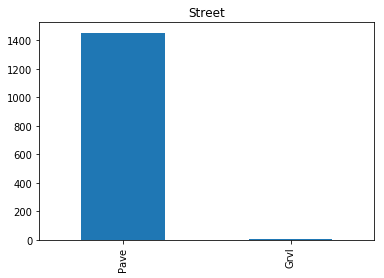

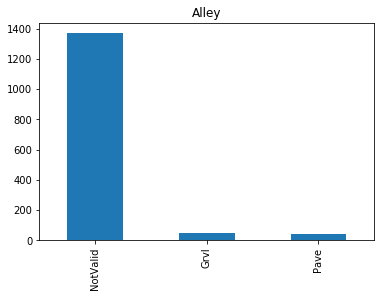

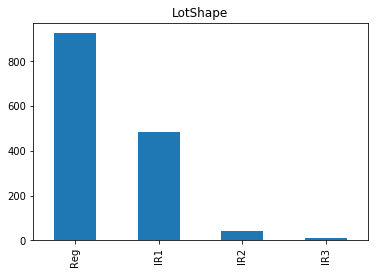

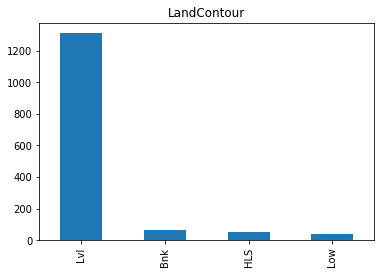

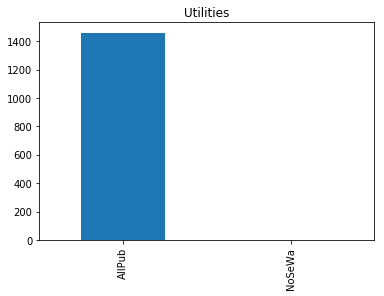

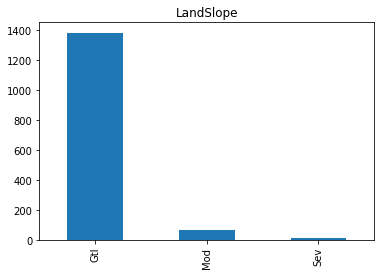

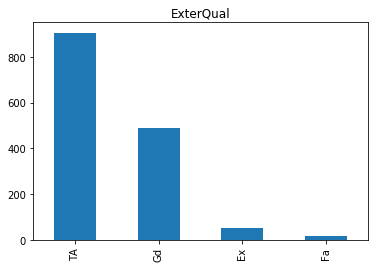

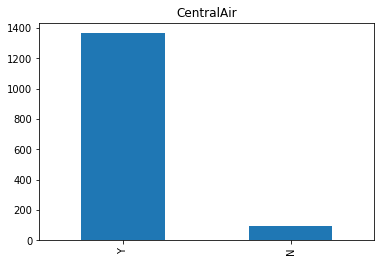

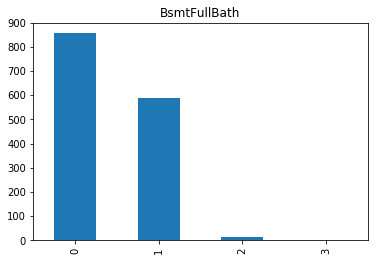

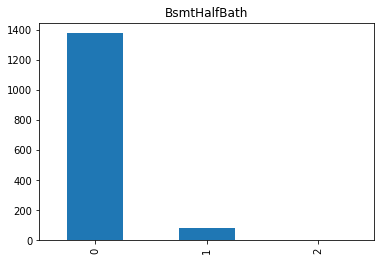

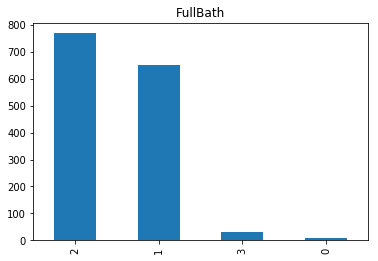

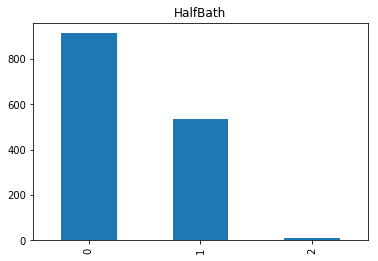

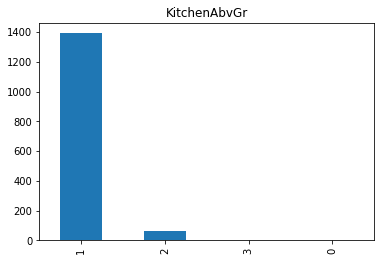

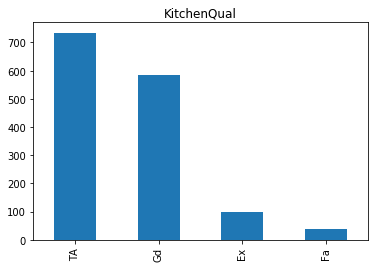

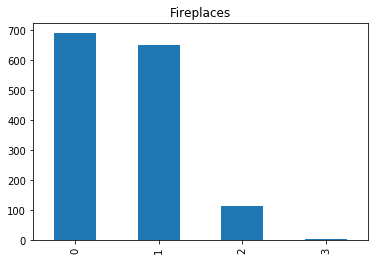

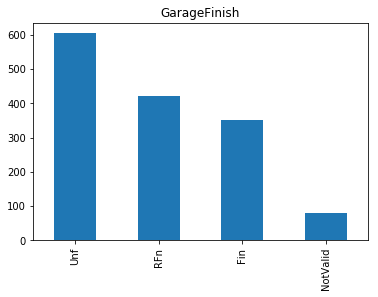

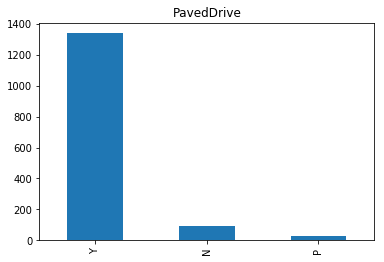

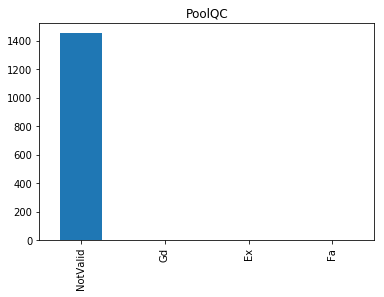

In [13]:
for col in train_1.columns:
    if (len(train_1[col].unique())<5):
        fig, ax = plt.subplots()
        plt.title(col)
        train_1[col].value_counts().plot(ax=ax, kind='bar')

In [14]:
# Deleting some of the columns since they don't have much variance in the data.

In [15]:
drop_col =[ 'Street','Alley','LandContour','Utilities','LandSlope','CentralAir','BsmtHalfBath','KitchenAbvGr','PavedDrive','PoolQC',]
train_1 = train_1.drop(drop_col,axis =1)

In [16]:
train_1.shape

(1460, 70)

In [17]:
#removing column that contain same kind of  information
cols_drop = ['Condition2','Exterior2nd','BsmtFinType2','GarageQual']
train_1 = train_1.drop(cols_drop,axis =1)
train_1.shape

(1460, 66)

In [18]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 n

MSZoning :
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

LotShape :
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

LotConfig :
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Neighborhood :
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Condition1 :
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64 

BldgType :
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs 

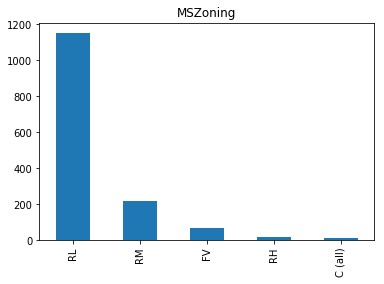

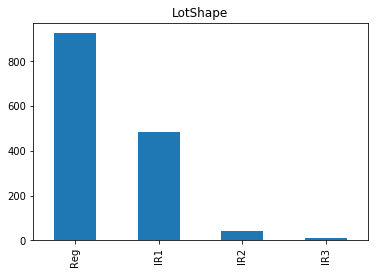

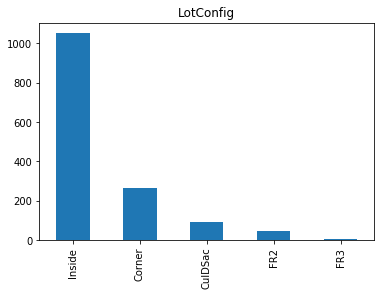

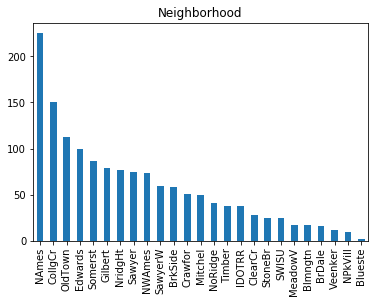

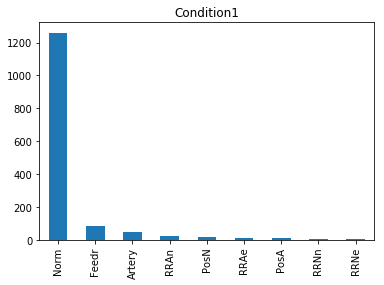

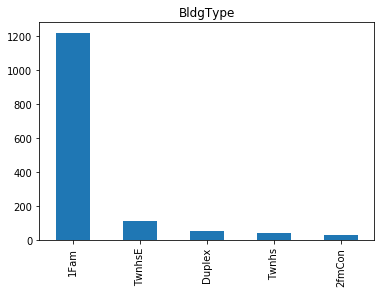

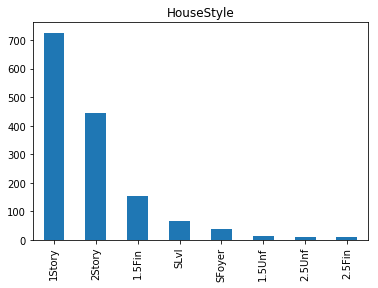

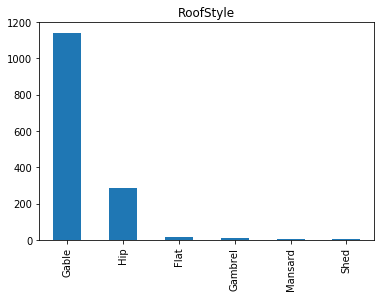

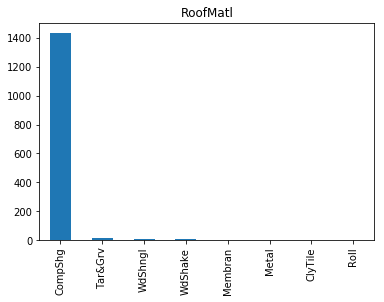

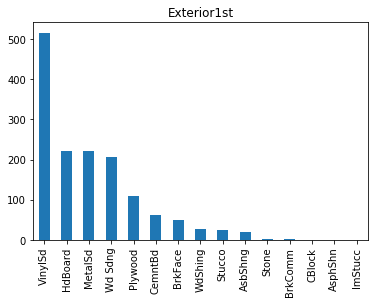

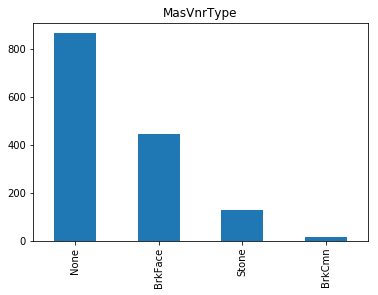

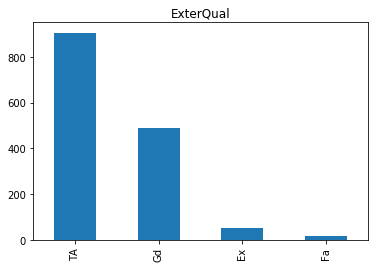

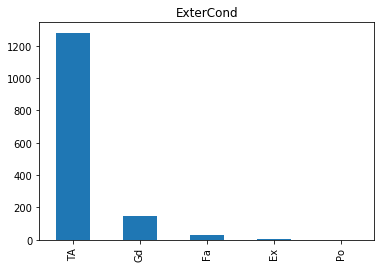

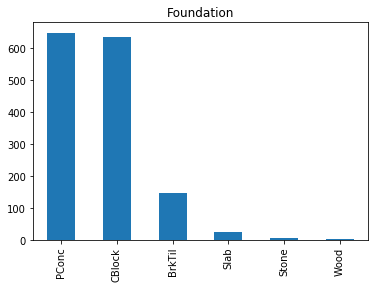

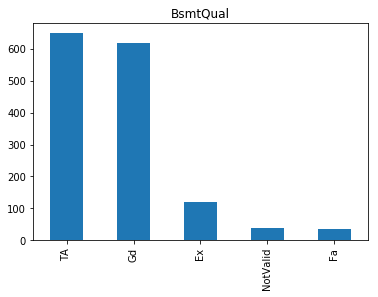

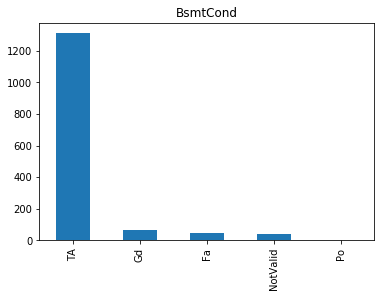

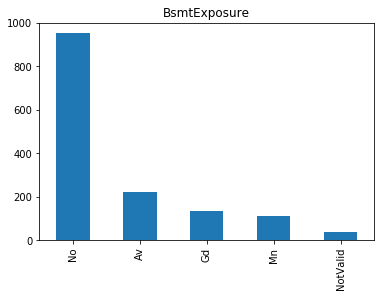

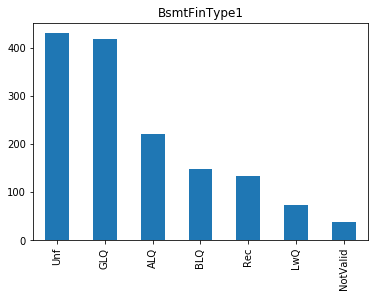

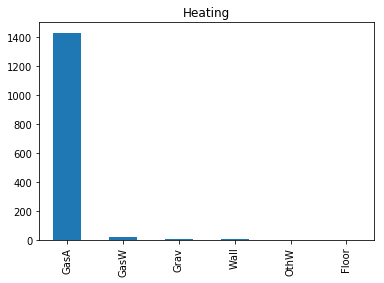

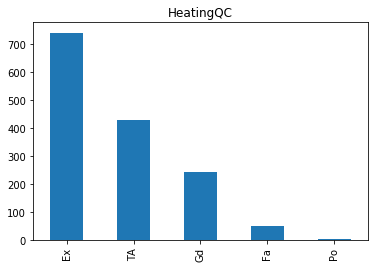

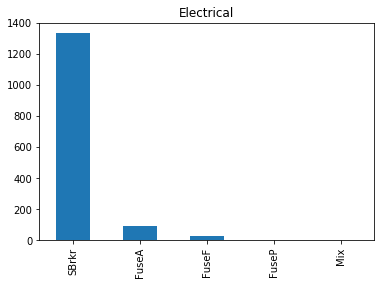

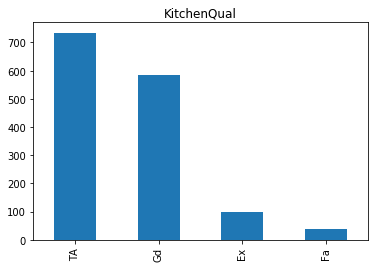

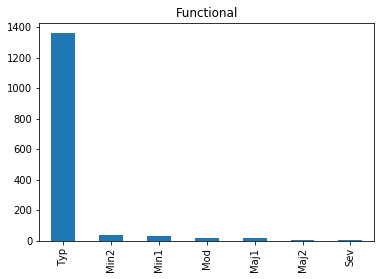

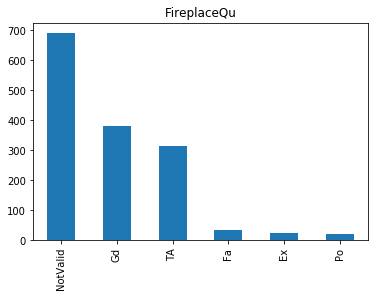

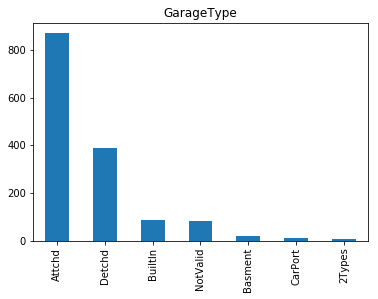

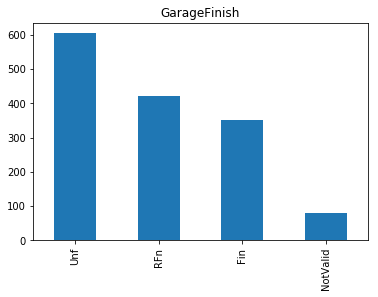

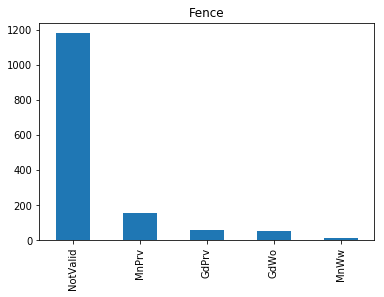

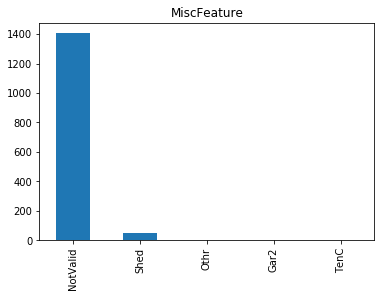

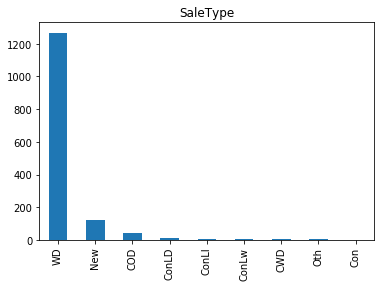

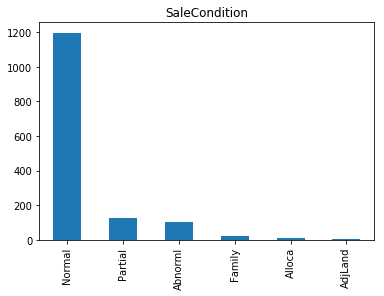

In [19]:
# Exploring the unique value count of all the categorical columns
cols = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
for name in cols:
   print(name,':')
   print(train_1.select_dtypes(include=['object'])[name].value_counts(),'\n')
   fig, ax = plt.subplots()
   plt.title(name)
   train_1.select_dtypes(include=['object'])[name].value_counts().plot(ax=ax, kind='bar')

In [20]:
# Dropping columns that does not have much variance
cols_drop = ['Condition1', 'BldgType','RoofMatl','ExterCond','BsmtCond', 'Heating', 'Electrical','Functional','Fence',
             'MiscFeature', 'SaleType', 'SaleCondition']
train_1 = train_1.drop(cols_drop,axis =1)

In [21]:
train_1.shape 

(1460, 54)

In [22]:
cols = ['MSZoning','LotShape','LotConfig','Neighborhood','HouseStyle','RoofStyle','Exterior1st','MasVnrType','ExterQual',
 'Foundation','BsmtQual', 'BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish']
for name in cols:
   print(name,':')
   print(train_1.select_dtypes(include=['object'])[name].value_counts(),'\n')

MSZoning :
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

LotShape :
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

LotConfig :
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Neighborhood :
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

HouseStyle :
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64 

RoofStyle :
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard  

In [23]:
#removing categories from columns with count less than 14

count=train_1.Neighborhood.value_counts()
train_2= train_1[~train_1['Neighborhood'].isin(count[count < 14].index)]

count=train_1.LotConfig.value_counts()
train_2= train_1[~train_1['LotConfig'].isin(count[count < 14].index)]

count=train_1.HouseStyle.value_counts()
train_2= train_1[~train_1['HouseStyle'].isin(count[count < 14].index)]

count=train_1.RoofStyle.value_counts()
train_2= train_1[~train_1['RoofStyle'].isin(count[count < 14].index)]

count=train_1.Exterior1st.value_counts()
train_2= train_1[~train_1['Exterior1st'].isin(count[count < 14].index)]

count=train_1.ExterQual.value_counts()
train_2= train_1[~train_1['ExterQual'].isin(count[count < 14].index)]


count=train_1.Foundation.value_counts()
train_2= train_1[~train_1['Foundation'].isin(count[count < 14].index)]


count=train_1.HeatingQC.value_counts()
train_2= train_1[~train_1['HeatingQC'].isin(count[count < 14].index)]


count=train_1.GarageType.value_counts()
train_2= train_1[~train_1['GarageType'].isin(count[count < 14].index)]


count=train_1.MSZoning.value_counts()
train_2= train_1[~train_1['MSZoning'].isin(count[count < 14].index)]


count=train_1.LotShape.value_counts()
train_2= train_1[~train_1['LotShape'].isin(count[count < 14].index)]

train_2.shape

(1450, 54)

In [24]:
train_2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1194.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,57.006897,69.649079,10304.266897,6.094483,5.580690,1971.153793,1984.790345,103.852288,439.015862,46.304828,...,94.157931,46.536552,22.105517,3.433103,15.063448,2.446897,43.788966,6.322759,2007.818621,180679.021379
std,42.395570,22.764547,8304.138479,1.381644,1.113646,30.202431,20.661227,180.589861,433.764211,160.552590,...,125.306230,66.102189,61.302376,29.416948,55.829402,38.314852,497.818831,2.703543,1.329523,79396.356505
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7536.250000,5.000000,5.000000,1954.000000,1966.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9452.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,383.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162900.000000
75%,70.000000,80.000000,11509.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,707.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 54 columns):
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1194 non-null float64
LotArea          1450 non-null int64
LotShape         1450 non-null object
LotConfig        1450 non-null object
Neighborhood     1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
Exterior1st      1450 non-null object
MasVnrType       1442 non-null object
MasVnrArea       1442 non-null float64
ExterQual        1450 non-null object
Foundation       1450 non-null object
BsmtQual         1450 non-null object
BsmtExposure     1450 non-null object
BsmtFinType1     1450 non-null object
BsmtFinSF1       1450 non-null int64
BsmtFinSF2       1450 non-null int64
BsmtUnfSF        1450 non

### There are 4 variables having left up with null values.
 - LotFrontage
 - MasVnrType  
 - MasVnrArea  
 - GarageYrBlt      

### Let's understand each of these variables and impute those null values

In [26]:
train_2.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93., 129., 140.,  35.,  37., 118.,  87.,
       116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,
       130.,  53., 137.,  30.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 138., 160., 152., 124., 153.,  46.])

In [27]:
train_2.LotFrontage.value_counts()

60.0     142
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
63.0      17
55.0      17
79.0      17
100.0     16
51.0      15
74.0      15
66.0      14
52.0      14
59.0      13
82.0      12
67.0      12
43.0      12
40.0      12
71.0      12
57.0      12
        ... 
174.0      2
134.0      2
109.0      2
115.0      2
122.0      2
116.0      2
129.0      2
124.0      2
121.0      2
114.0      2
101.0      2
118.0      2
33.0       1
140.0      1
153.0      1
111.0      1
149.0      1
141.0      1
313.0      1
46.0       1
152.0      1
138.0      1
160.0      1
128.0      1
144.0      1
39.0       1
106.0      1
112.0      1
38.0       1
137.0      1
Name: LotFrontage, Length: 107, dtype: int64

In [28]:
#Replacing the null values with the mean of the data
train_2['LotFrontage'] = train_2['LotFrontage'].fillna((train_2['LotFrontage'].mean()))
train_2['LotFrontage'].unique()

array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  69.64907873,
        51.        ,  50.        ,  70.        ,  91.        ,
        72.        ,  66.        , 101.        ,  57.        ,
        44.        , 110.        ,  98.        ,  47.        ,
       108.        , 112.        ,  74.        , 115.        ,
        61.        ,  48.        ,  33.        ,  52.        ,
       100.        ,  24.        ,  89.        ,  63.        ,
        76.        ,  81.        ,  95.        ,  69.        ,
        21.        ,  32.        ,  78.        , 121.        ,
       122.        ,  40.        , 105.        ,  73.        ,
        77.        ,  64.        ,  94.        ,  34.        ,
        90.        ,  55.        ,  88.        ,  82.        ,
        71.        , 120.        , 107.        ,  92.        ,
       134.        ,  62.        ,  86.        , 141.        ,
        97.        ,  54.        ,  41.        ,  79.  

In [29]:
train_2.MasVnrArea.unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [30]:
train_2.MasVnrArea.value_counts()

0.0       852
72.0        8
180.0       8
108.0       8
16.0        7
120.0       7
80.0        6
340.0       6
200.0       6
106.0       6
132.0       5
360.0       5
84.0        5
320.0       5
170.0       5
160.0       4
252.0       4
216.0       4
270.0       4
178.0       4
183.0       4
168.0       4
246.0       4
100.0       4
196.0       4
300.0       4
220.0       4
76.0        4
336.0       4
40.0        4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 326, dtype: int64

In [31]:
#Replacing the null values with the mean of the data
train_2['MasVnrArea'] = train_2['MasVnrArea'].fillna((train_2['MasVnrArea'].mean()))
train_2['MasVnrArea'].unique()

array([1.96000000e+02, 0.00000000e+00, 1.62000000e+02, 3.50000000e+02,
       1.86000000e+02, 2.40000000e+02, 2.86000000e+02, 3.06000000e+02,
       2.12000000e+02, 1.80000000e+02, 3.80000000e+02, 2.81000000e+02,
       6.40000000e+02, 2.00000000e+02, 2.46000000e+02, 1.32000000e+02,
       6.50000000e+02, 1.01000000e+02, 4.12000000e+02, 2.72000000e+02,
       4.56000000e+02, 1.03100000e+03, 1.78000000e+02, 5.73000000e+02,
       3.44000000e+02, 2.87000000e+02, 1.67000000e+02, 1.11500000e+03,
       4.00000000e+01, 1.04000000e+02, 5.76000000e+02, 4.43000000e+02,
       4.68000000e+02, 6.60000000e+01, 2.20000000e+01, 2.84000000e+02,
       7.60000000e+01, 2.03000000e+02, 6.80000000e+01, 1.83000000e+02,
       4.80000000e+01, 2.80000000e+01, 3.36000000e+02, 6.00000000e+02,
       7.68000000e+02, 4.80000000e+02, 2.20000000e+02, 1.84000000e+02,
       1.12900000e+03, 1.16000000e+02, 1.35000000e+02, 2.66000000e+02,
       8.50000000e+01, 3.09000000e+02, 1.36000000e+02, 2.88000000e+02,
      

In [32]:
train_2.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [33]:
train_2.MasVnrType.value_counts()

None       855
BrkFace    445
Stone      127
BrkCmn      15
Name: MasVnrType, dtype: int64

In [34]:
#replacing null value with mode 
train_2['MasVnrType'] = train_2['MasVnrType'].fillna(train_2['MasVnrType'].mode()[0])
train_2['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [35]:
train_2.MasVnrType.value_counts()

None       863
BrkFace    445
Stone      127
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
train_2.GarageYrBlt.value_counts()

2005.0    64
2006.0    58
2004.0    52
2003.0    50
2007.0    49
1977.0    35
1998.0    29
1999.0    29
1976.0    29
2008.0    28
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
2009.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1957.0    20
1996.0    20
1970.0    19
1960.0    19
1954.0    19
1978.0    19
1965.0    19
1997.0    19
1995.0    18
1994.0    18
          ..
1936.0     5
1916.0     5
1922.0     5
1928.0     4
1945.0     4
1946.0     4
1935.0     4
1982.0     4
1931.0     4
1910.0     3
1923.0     3
1952.0     3
2010.0     3
1938.0     3
1924.0     3
1932.0     3
1921.0     3
1918.0     2
1942.0     2
1929.0     2
1937.0     2
1914.0     2
1915.0     2
1934.0     2
1947.0     2
1906.0     1
1927.0     1
1933.0     1
1908.0     1
1900.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [37]:
train_2.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [38]:
#replacing null value with mode 
train_2['GarageYrBlt'] = train_2['GarageYrBlt'].fillna(train_2['GarageYrBlt'].mode()[0])
train_2['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1983., 1977., 1997., 1985., 1963.,
       1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [39]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 54 columns):
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1450 non-null float64
LotArea          1450 non-null int64
LotShape         1450 non-null object
LotConfig        1450 non-null object
Neighborhood     1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
Exterior1st      1450 non-null object
MasVnrType       1450 non-null object
MasVnrArea       1450 non-null float64
ExterQual        1450 non-null object
Foundation       1450 non-null object
BsmtQual         1450 non-null object
BsmtExposure     1450 non-null object
BsmtFinType1     1450 non-null object
BsmtFinSF1       1450 non-null int64
BsmtFinSF2       1450 non-null int64
BsmtUnfSF        1450 non

In [40]:
# All the null values are now removed.


In [41]:
train_2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,57.006897,69.649079,10304.266897,6.094483,5.580690,1971.153793,1984.790345,103.852288,439.015862,46.304828,...,94.157931,46.536552,22.105517,3.433103,15.063448,2.446897,43.788966,6.322759,2007.818621,180679.021379
std,42.395570,20.655944,8304.138479,1.381644,1.113646,30.202431,20.661227,180.090648,433.764211,160.552590,...,125.306230,66.102189,61.302376,29.416948,55.829402,38.314852,497.818831,2.703543,1.329523,79396.356505
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7536.250000,5.000000,5.000000,1954.000000,1966.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.649079,9452.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,383.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162900.000000
75%,70.000000,79.000000,11509.000000,7.000000,6.000000,2000.000000,2004.000000,165.750000,707.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


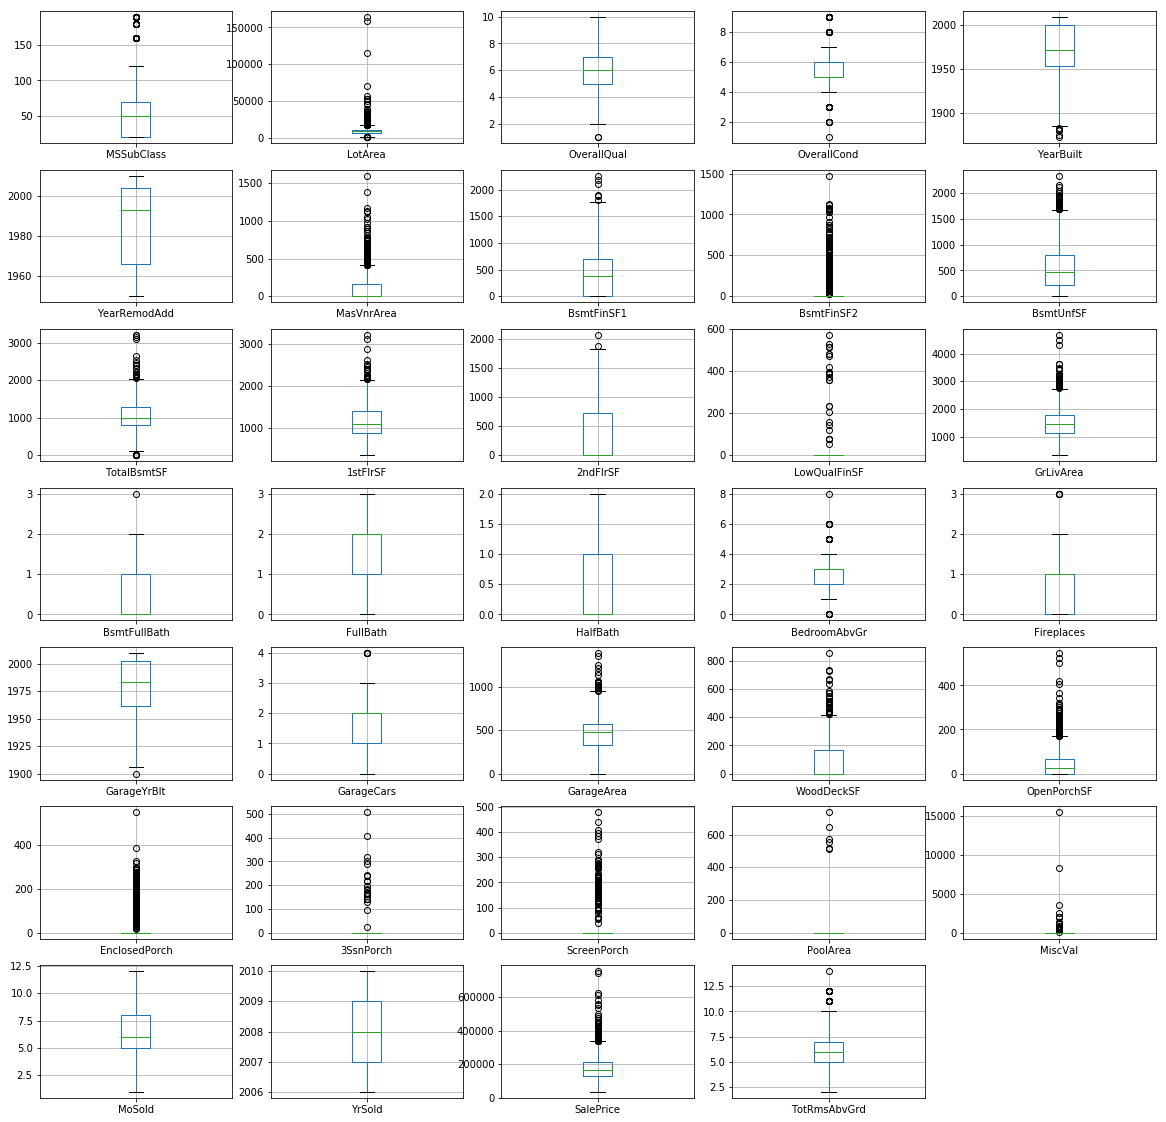

In [42]:
# Now checking for Outliers in numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(7,5,1)
train_2.boxplot(['MSSubClass'])
plt.subplot(7,5,2)
train_2.boxplot(['LotArea'])
plt.subplot(7,5,3)
train_2.boxplot(['OverallQual'])
plt.subplot(7,5,4)
train_2.boxplot(['OverallCond'])
plt.subplot(7,5,5)
train_2.boxplot(['YearBuilt'])
plt.subplot(7,5,6)
train_2.boxplot(['YearRemodAdd'])
plt.subplot(7,5,7)
train_2.boxplot(['MasVnrArea'])
plt.subplot(7,5,8)
train_2.boxplot(['BsmtFinSF1'])
plt.subplot(7,5,9)
train_2.boxplot(['BsmtFinSF2'])
plt.subplot(7,5,10)
train_2.boxplot(['BsmtUnfSF'])
plt.subplot(7,5,11)
train_2.boxplot(['TotalBsmtSF'])
plt.subplot(7,5,12)
train_2.boxplot(['1stFlrSF'])
plt.subplot(7,5,13)
train_2.boxplot(['2ndFlrSF'])
plt.subplot(7,5,14)
train_2.boxplot(['LowQualFinSF'])
plt.subplot(7,5,15)
train_2.boxplot(['GrLivArea'])
plt.subplot(7,5,16)
train_2.boxplot(['BsmtFullBath'])
plt.subplot(7,5,17)
train_2.boxplot(['FullBath'])
plt.subplot(7,5,18)
train_2.boxplot(['HalfBath'])
plt.subplot(7,5,19)
train_2.boxplot(['BedroomAbvGr'])
plt.subplot(7,5,20)
train_2.boxplot(['Fireplaces'])
plt.subplot(7,5,21)
train_2.boxplot(['GarageYrBlt'])
plt.subplot(7,5,22)
train_2.boxplot(['GarageCars'])
plt.subplot(7,5,23)
train_2.boxplot(['GarageArea'])
plt.subplot(7,5,24)
train_2.boxplot(['WoodDeckSF'])
plt.subplot(7,5,25)
train_2.boxplot(['OpenPorchSF'])
plt.subplot(7,5,26)
train_2.boxplot(['EnclosedPorch'])
plt.subplot(7,5,27)
train_2.boxplot(['3SsnPorch'])
plt.subplot(7,5,28)
train_2.boxplot(['ScreenPorch'])
plt.subplot(7,5,29)
train_2.boxplot(['PoolArea'])
plt.subplot(7,5,30)
train_2.boxplot(['MiscVal'])
plt.subplot(7,5,31)
train_2.boxplot(['MoSold'])
plt.subplot(7,5,32)
train_2.boxplot(['YrSold'])
plt.subplot(7,5,33)
train_2.boxplot(['SalePrice'])
plt.subplot(7,5,34)
train_2.boxplot(['TotRmsAbvGrd'])

In [43]:
# Removing Outlier

Q1 = train_2.MSSubClass.quantile(0.05)
Q3 = train_2.MSSubClass.quantile(0.95)
train_3 = train_2[(train_2.MSSubClass  >= Q1) & (train_2.MSSubClass  <= Q3)]

Q1 = train_2.LotArea.quantile(0.05)
Q3 = train_2.LotArea.quantile(0.95)
train_3 = train_2[(train_2.LotArea  >= Q1) & (train_2.LotArea   <= Q3)]

Q1 = train_2.OverallQual.quantile(0.05)
Q3 = train_2.OverallQual.quantile(0.95)
train_3 = train_2[(train_2.OverallQual  >= Q1) & (train_2.OverallQual <= Q3)]

Q1 = train_2.OverallCond.quantile(0.05)
Q3 = train_2.OverallCond.quantile(0.95)
train_3 = train_2[(train_2.OverallCond  >= Q1) & (train_2.OverallCond <= Q3)]

Q1 = train_2.YearBuilt.quantile(0.05)
Q3 = train_2.YearBuilt.quantile(0.95)
train_3 = train_2[(train_2.YearBuilt  >= Q1) & (train_2.YearBuilt <= Q3)]

Q1 = train_2.MasVnrArea.quantile(0.05)
Q3 = train_2.MasVnrArea.quantile(0.95)
train_3 = train_2[(train_2.MasVnrArea  >= Q1) & (train_2.MasVnrArea   <= Q3)]

Q1 = train_2.BsmtFinSF1.quantile(0.05)
Q3 = train_2.BsmtFinSF1.quantile(0.95)
train_3 = train_2[(train_2.BsmtFinSF1 >= Q1) & (train_2.BsmtFinSF1 <= Q3)]

Q1 = train_2.BsmtFinSF2.quantile(0.05)
Q3 = train_2.BsmtFinSF2.quantile(0.95)
train_3 = train_2[(train_2.BsmtFinSF2 >= Q1) & (train_2.BsmtFinSF2 <= Q3)]


Q1 = train_2.BsmtUnfSF.quantile(0.05)
Q3 = train_2.BsmtUnfSF.quantile(0.95)
train_3 = train_2[(train_2.BsmtUnfSF >= Q1) & (train_2.BsmtUnfSF <= Q3)]

Q1 = train_2.TotalBsmtSF.quantile(0.05)
Q3 = train_2.TotalBsmtSF.quantile(0.95)
train_3 = train_2[(train_2.TotalBsmtSF >= Q1) & (train_2.TotalBsmtSF <= Q3)]

Q1 = train_2['1stFlrSF'].quantile(0.05)
Q3 = train_2['1stFlrSF'].quantile(0.95)
train_3 = train_2[(train_2['1stFlrSF'] >= Q1) & (train_2['1stFlrSF'] <= Q3)]

Q1 = train_2['2ndFlrSF'].quantile(0.05)
Q3 = train_2['2ndFlrSF'].quantile(0.95)
train_3 = train_2[(train_2['2ndFlrSF'] >= Q1) & (train_2['2ndFlrSF'] <= Q3)]

Q1 = train_2.LowQualFinSF.quantile(0.05)
Q3 = train_2.LowQualFinSF.quantile(0.95)
train_3 = train_2[(train_2.LowQualFinSF >= Q1) & (train_2.LowQualFinSF <= Q3)]

Q1 = train_2.GrLivArea.quantile(0.05)
Q3 = train_2.GrLivArea.quantile(0.95)
train_3 = train_2[(train_2.GrLivArea >= Q1) & (train_2.GrLivArea <= Q3)]

Q1 = train_2.BsmtFullBath.quantile(0.05)
Q3 = train_2.BsmtFullBath.quantile(0.95)
train_3 = train_2[(train_2.BsmtFullBath >= Q1) & (train_2.BsmtFullBath <= Q3)]

Q1 = train_2.BedroomAbvGr.quantile(0.05)
Q3 = train_2.BedroomAbvGr.quantile(0.95)
train_3 = train_2[(train_2.BedroomAbvGr >= Q1) & (train_2.BedroomAbvGr <= Q3)]

Q1 = train_2.TotRmsAbvGrd.quantile(0.05)
Q3 = train_2.TotRmsAbvGrd.quantile(0.95)
train_3 = train_2[(train_2.TotRmsAbvGrd >= Q1) & (train_2.TotRmsAbvGrd <= Q3)]

Q1 = train_2.Fireplaces.quantile(0.05)
Q3 = train_2.Fireplaces.quantile(0.95)
train_3 = train_2[(train_2.Fireplaces >= Q1) & (train_2.Fireplaces <= Q3)]

Q1 = train_2.GarageYrBlt.quantile(0.05)
Q3 = train_2.GarageYrBlt.quantile(0.95)
train_3 = train_2[(train_2.GarageYrBlt >= Q1) & (train_2.GarageYrBlt <= Q3)]

Q1 = train_2.GarageCars.quantile(0.05)
Q3 = train_2.GarageCars.quantile(0.95)
train_3 = train_2[(train_2.GarageCars >= Q1) & (train_2.GarageCars <= Q3)]

Q1 = train_2.GarageArea.quantile(0.05)
Q3 = train_2.GarageArea.quantile(0.95)
train_3 = train_2[(train_2.GarageArea >= Q1) & (train_2.GarageArea <= Q3)]

Q1 = train_2.WoodDeckSF.quantile(0.05)
Q3 = train_2.WoodDeckSF.quantile(0.95)
train_3 = train_2[(train_2.WoodDeckSF >= Q1) & (train_2.WoodDeckSF <= Q3)]

Q1 = train_2.OpenPorchSF.quantile(0.05)
Q3 = train_2.OpenPorchSF.quantile(0.95)
train_3 = train_2[(train_2.OpenPorchSF >= Q1) & (train_2.OpenPorchSF <= Q3)]

Q1 = train_2.EnclosedPorch.quantile(0.05)
Q3 = train_2.EnclosedPorch.quantile(0.95)
train_3 = train_2[(train_2.EnclosedPorch >= Q1) & (train_2.EnclosedPorch <= Q3)]

Q1 = train_2['3SsnPorch'].quantile(0.05)
Q3 = train_2['3SsnPorch'].quantile(0.95)
train_3 = train_2[(train_2['3SsnPorch'] >= Q1) & (train_2['3SsnPorch'] <= Q3)]

Q1 = train_2.ScreenPorch.quantile(0.05)
Q3 = train_2.ScreenPorch.quantile(0.95)
train_3 = train_2[(train_2.ScreenPorch >= Q1) & (train_2.ScreenPorch <= Q3)]

Q1 = train_2.PoolArea.quantile(0.05)
Q3 = train_2.PoolArea.quantile(0.95)
train_3 = train_2[(train_2.PoolArea >= Q1) & (train_2.PoolArea <= Q3)]

Q1 = train_2.MiscVal.quantile(0.05)
Q3 = train_2.MiscVal.quantile(0.95)
train_3 = train_2[(train_2.MiscVal >= Q1) & (train_2.MiscVal <= Q3)]

Q1 = train_2.SalePrice.quantile(0.05)
Q3 = train_2.SalePrice.quantile(0.95)
train_3 = train_2[(train_2.SalePrice >= Q1) & (train_2.SalePrice <= Q3)]

In [44]:
train_3.shape

(1307, 54)

## Data Preparation

In [45]:
#label Encoding variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#MSSubClass
le.fit(train_3.MSSubClass.drop_duplicates()) 
train_3.MSSubClass = le.transform(train_3.MSSubClass)


#LotShape
le.fit(train_3.LotShape.drop_duplicates()) 
train_3.LotShape = le.transform(train_3.LotShape)

#OverallCond
le.fit(train_3.OverallCond.drop_duplicates()) 
train_3.OverallCond = le.transform(train_3.OverallCond)

#YearRemodAdd
le.fit(train_3.YearRemodAdd.drop_duplicates()) 
train_3.YearRemodAdd = le.transform(train_3.YearRemodAdd)

#GarageYrBlt
le.fit(train_3.GarageYrBlt.drop_duplicates()) 
train_3.GarageYrBlt = le.transform(train_3.GarageYrBlt)

#YrSold
le.fit(train_3.YrSold.drop_duplicates()) 
train_3.YrSold = le.transform(train_3.YrSold)
train_3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,5,RL,65.0,8450,2,Inside,CollgCr,2Story,7,2,...,0,61,0,0,0,0,0,2,2,208500
1,0,RL,80.0,9600,2,FR2,Veenker,1Story,6,5,...,298,0,0,0,0,0,0,5,1,181500
2,5,RL,68.0,11250,0,Inside,CollgCr,2Story,7,2,...,0,42,0,0,0,0,0,9,2,223500
3,6,RL,60.0,9550,0,Corner,Crawfor,2Story,7,2,...,0,35,272,0,0,0,0,2,0,140000
4,5,RL,84.0,14260,0,FR2,NoRidge,2Story,8,2,...,192,84,0,0,0,0,0,12,2,250000


In [46]:
# Converting categories to values 
final=train_3.replace(['NotValid','Po','Fa','TA','Gd','Ex','No','Mn','Av','Gd','Unf','LwQ','BLQ','Rec','ALQ','GLQ'], [0,1,2,3,4,5,1,2,3,4,1,2,3,4,5,6])
final.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,5,RL,65.0,8450,2,Inside,CollgCr,2Story,7,2,...,0,61,0,0,0,0,0,2,2,208500
1,0,RL,80.0,9600,2,FR2,Veenker,1Story,6,5,...,298,0,0,0,0,0,0,5,1,181500
2,5,RL,68.0,11250,0,Inside,CollgCr,2Story,7,2,...,0,42,0,0,0,0,0,9,2,223500
3,6,RL,60.0,9550,0,Corner,Crawfor,2Story,7,2,...,0,35,272,0,0,0,0,2,0,140000
4,5,RL,84.0,14260,0,FR2,NoRidge,2Story,8,2,...,192,84,0,0,0,0,0,12,2,250000


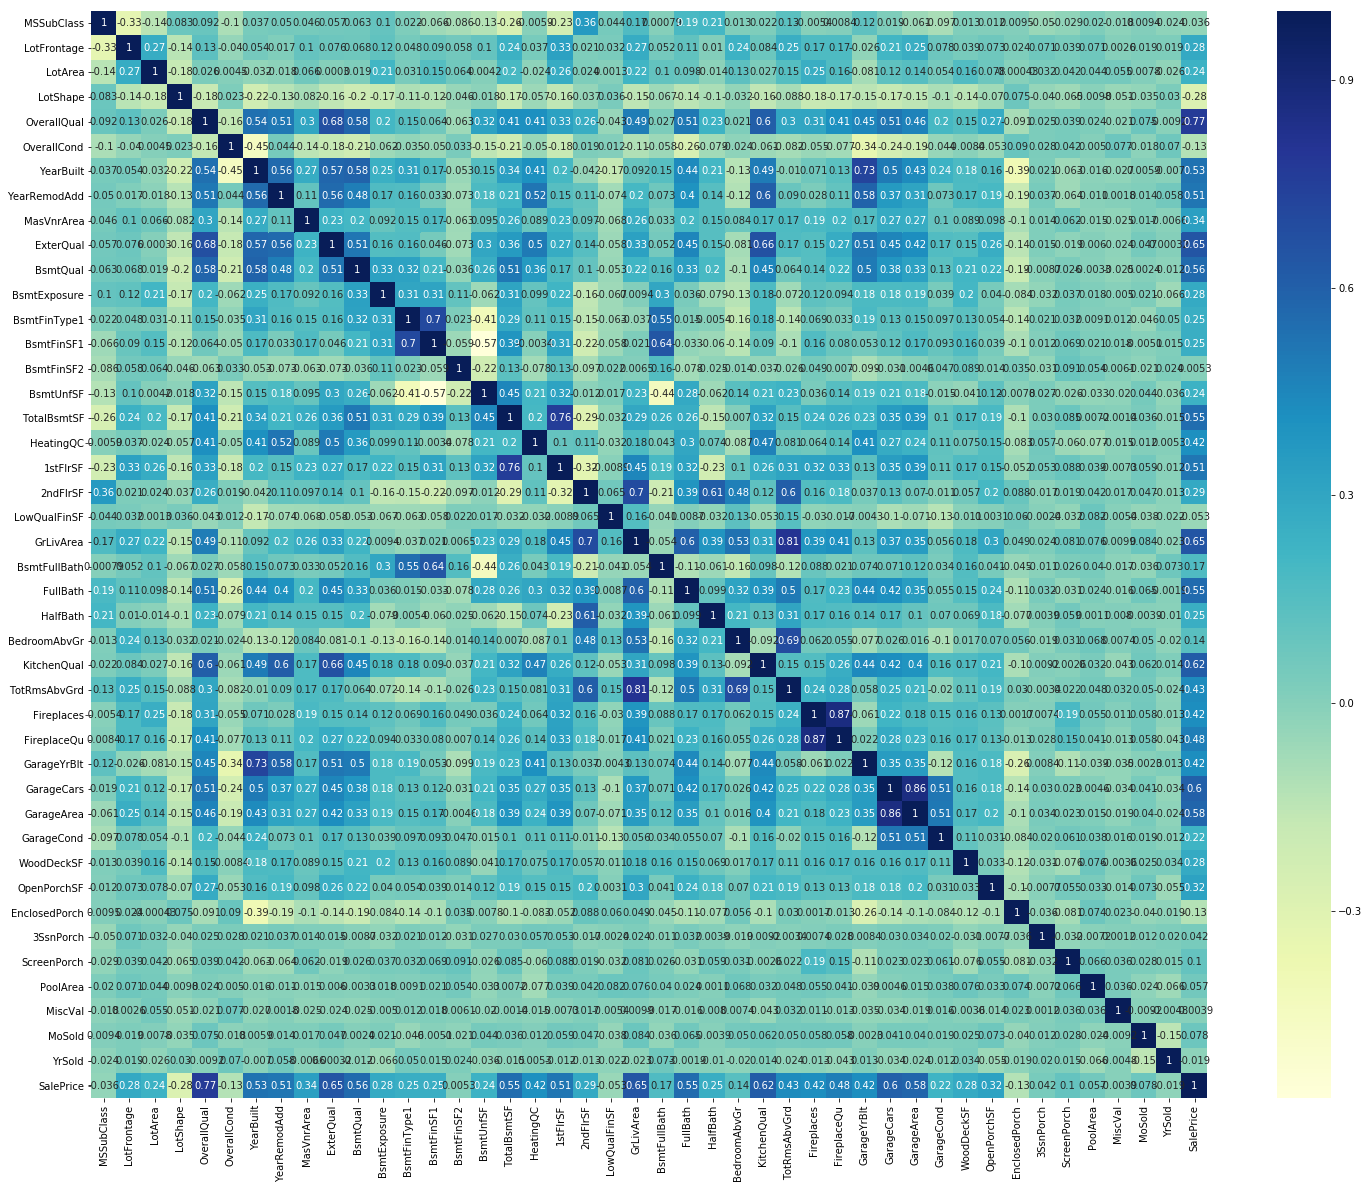

In [47]:
plt.figure(figsize = (25, 20))
sns.heatmap(final.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [48]:
final.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,4.241775,69.286935,10201.970161,1.309105,6.053558,2.644223,1971.328998,34.914308,92.058888,3.366488,...,91.426167,45.775822,21.356542,3.459067,15.413925,2.289977,44.322877,6.335119,1.801071,173573.275440
std,4.187745,19.856754,8367.213813,0.937202,1.195401,1.074401,29.480657,20.192838,157.475968,0.521698,...,121.500898,65.000008,60.755389,29.538676,56.207196,37.340525,514.729501,2.696095,1.324836,54171.111782
min,0.000000,21.000000,1300.000000,0.000000,3.000000,0.000000,1872.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,88000.000000
25%,0.000000,60.000000,7560.000000,0.000000,5.000000,2.000000,1954.000000,17.500000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,132500.000000
50%,4.000000,69.649079,9375.000000,2.000000,6.000000,2.000000,1972.000000,43.000000,0.000000,3.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,162500.000000
75%,6.000000,78.000000,11325.000000,2.000000,7.000000,3.000000,2000.000000,53.000000,148.000000,4.000000,...,168.000000,65.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,205000.000000
max,14.000000,313.000000,164660.000000,2.000000,10.000000,6.000000,2009.000000,60.000000,1600.000000,5.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,4.000000,325624.000000


In [49]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(final[['MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle','RoofStyle', 'Exterior1st', 
'MasVnrType', 'Foundation','GarageType', 'GarageFinish']], drop_first=True)

# Adding the results to the master dataframe
final = pd.concat([final, dummy1], axis=1)

In [50]:
# Dropping the repeated variables
final = final.drop(['MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle','RoofStyle', 'Exterior1st', 
'MasVnrType', 'Foundation','GarageType', 'GarageFinish'], 1)

In [51]:
final.shape

(1307, 118)

## Modelling

In [52]:
# split into X and y
X = final.drop(['SalePrice'], 1)
y = final['SalePrice']

In [53]:
# Scaling Data
scaler = StandardScaler()

cols = X.columns
X[cols] = scaler.fit_transform(X[cols])

X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_1,GarageFinish_Fin,GarageFinish_RFn
0,0.181127,-0.215976,-0.209465,0.737471,0.79204,-0.599841,1.074709,0.895992,0.660297,1.214792,...,-0.047965,-0.06197,0.794802,-0.111326,-0.234271,-0.078477,-0.613017,-0.869897,-0.536362,1.505822
1,-1.013290,0.539724,-0.071971,0.737471,-0.04482,2.193482,0.158504,-0.441628,-0.584814,-0.702760,...,-0.047965,-0.06197,0.794802,-0.111326,-0.234271,-0.078477,-0.613017,-0.869897,-0.536362,1.505822
2,0.181127,-0.064836,0.125302,-1.397357,0.79204,-0.599841,1.006842,0.846450,0.444308,1.214792,...,-0.047965,-0.06197,0.794802,-0.111326,-0.234271,-0.078477,-0.613017,-0.869897,-0.536362,1.505822
3,0.420011,-0.467876,-0.077949,-1.397357,0.79204,-0.599841,-1.911442,-0.738877,-0.584814,-0.702760,...,-0.047965,-0.06197,-1.258175,-0.111326,-0.234271,-0.078477,1.631277,1.149562,-0.536362,-0.664089
4,0.181127,0.741244,0.485177,-1.397357,1.62890,-0.599841,0.972908,0.747367,1.638598,1.214792,...,-0.047965,-0.06197,0.794802,-0.111326,-0.234271,-0.078477,-0.613017,-0.869897,-0.536362,1.505822


In [54]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## Ridge Regression

In [55]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00624,0.007642,0.00312,0.006240,0.0001,{'alpha': 0.0001},-14928.706607,-15622.234190,-14440.753693,-14728.797119,...,-15015.114519,425.471523,27,-12310.377116,-12281.343823,-12305.811949,-12404.266720,-11410.011831,-12142.362288,368.562550
1,0.00312,0.006240,0.00000,0.000000,0.001,{'alpha': 0.001},-14928.644873,-15622.267289,-14440.726511,-14728.707639,...,-15015.073071,425.492967,26,-12310.372859,-12281.336549,-12305.817691,-12404.263908,-11410.003299,-12142.358861,368.565113
2,0.00312,0.006240,0.00000,0.000000,0.01,{'alpha': 0.01},-14928.027354,-15622.596887,-14440.454983,-14727.814742,...,-15014.658899,425.706992,25,-12310.330341,-12281.263850,-12305.874949,-12404.235796,-11409.918128,-12142.324613,368.590688
3,0.00624,0.007642,0.00312,0.006240,0.05,{'alpha': 0.05},-14925.279274,-15624.031567,-14439.254597,-14723.887606,...,-15012.824893,426.649271,24,-12310.142507,-12280.945949,-12306.125747,-12404.111129,-11409.542632,-12142.173593,368.703412
4,0.00684,0.008431,0.00332,0.006152,0.1,{'alpha': 0.1},-14921.837742,-15625.757439,-14437.768647,-14719.071088,...,-15010.547942,427.806897,23,-12309.910299,-12280.565807,-12306.430969,-12403.955940,-11409.080113,-12141.988625,368.842614


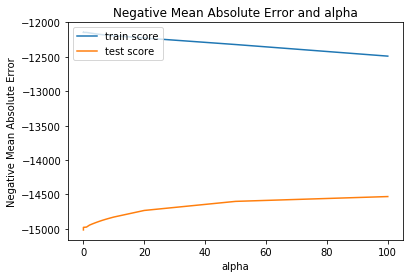

In [57]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
alpha = 60
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
pred_R = ridge.predict(X_test)
print(pd.Series(ridge.coef_, index = X.columns).sort_values(ascending = False))
print(mean_squared_error(y_test, pred_R))

OverallQual             9309.028643
GrLivArea               6453.162812
GarageArea              5497.716497
2ndFlrSF                5330.041237
Neighborhood_NridgHt    4761.945200
YearBuilt               4399.993635
Neighborhood_NoRidge    4234.140463
TotalBsmtSF             4023.747009
OverallCond             3923.972117
Neighborhood_Somerst    3815.650404
Exterior1st_BrkFace     3389.883466
KitchenQual             3329.711716
Neighborhood_StoneBr    2833.265169
Neighborhood_Crawfor    2711.323995
MSZoning_RL             2617.432858
BsmtFinSF1              2511.605599
LotArea                 2469.614154
ScreenPorch             2281.499586
BsmtFullBath            2268.251763
WoodDeckSF              2257.258593
1stFlrSF                2194.716240
BsmtFinType1            2080.677507
Fireplaces              2022.944939
BsmtQual                1970.178582
Foundation_PConc        1897.625106
YearRemodAdd            1875.862332
TotRmsAbvGrd            1859.893755
LotConfig_CulDSac       1837

In [59]:
# Calculating R-squared value for Ridge Regression
r_squared_test = r2_score(y_test, pred_R)
r_squared_test
pred_R_train = ridge.predict(X_train)
r_squared_train = r2_score(y_train, pred_R_train)
print(r_squared_train, r_squared_test)

0.8848904687346056 0.8764792838614264


## Lasso Regression

In [60]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.135760,0.024038,0.00312,0.006240,0.0001,{'alpha': 0.0001},-14928.776649,-15622.240197,-14440.756235,-14728.798285,...,-15015.131754,425.470565,28,-12310.377121,-12281.344696,-12305.811335,-12404.266905,-11410.012680,-12142.362547,368.562250
1,0.152525,0.036225,0.00240,0.002577,0.001,{'alpha': 0.001},-14928.766617,-15622.243318,-14440.750530,-14728.787539,...,-15015.126211,425.474160,27,-12310.376285,-12281.343528,-12305.810512,-12404.265774,-11410.011913,-12142.361603,368.562157
2,0.136884,0.007273,0.00512,0.005409,0.01,{'alpha': 0.01},-14928.666295,-15622.274528,-14440.693480,-14728.680076,...,-15015.070784,425.510105,26,-12310.367992,-12281.331846,-12305.802282,-12404.254458,-11410.004244,-12142.352164,368.561229
3,0.137204,0.031755,0.00060,0.001200,0.05,{'alpha': 0.05},-14928.220428,-15622.413238,-14440.439924,-14728.202463,...,-15014.824444,425.669893,25,-12310.331130,-12281.279926,-12305.765703,-12404.204164,-11409.970161,-12142.310217,368.557106
4,0.155087,0.021112,0.00572,0.005075,0.1,{'alpha': 0.1},-14927.663104,-15622.586626,-14440.122980,-14727.605447,...,-15014.515169,425.868620,24,-12310.285052,-12281.215025,-12305.719980,-12404.141297,-11409.928312,-12142.257933,368.551651


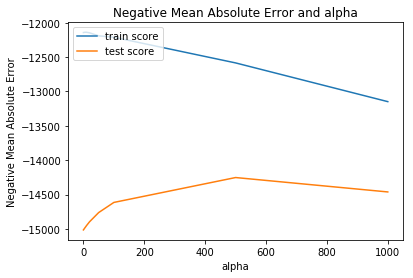

In [62]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
# Considering alpha of 500 to be maximum for the test data set. 

In [64]:
alpha =500
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
pred_L = lasso.predict(X_test)
print(pd.Series(lasso.coef_, index = X.columns).sort_values(ascending = False))

GrLivArea               14407.187728
OverallQual             11735.074092
GarageArea               6073.835113
YearBuilt                5596.005444
Neighborhood_NridgHt     4390.963478
Neighborhood_NoRidge     4013.503964
KitchenQual              3572.814695
OverallCond              3469.033113
Exterior1st_BrkFace      3216.322583
Neighborhood_Somerst     3075.464018
TotalBsmtSF              2997.567262
Neighborhood_Crawfor     2780.915284
LotArea                  2379.846656
ExterQual                2225.234628
Neighborhood_StoneBr     2209.783966
BsmtFullBath             2073.226972
ScreenPorch              2052.227828
Fireplaces               1982.522508
BsmtFinType1             1933.027568
WoodDeckSF               1904.862217
YearRemodAdd             1860.654600
LotConfig_CulDSac        1719.622642
BsmtExposure             1711.183552
LotFrontage              1489.688880
BsmtFinSF1               1418.572047
Foundation_PConc         1380.868114
GarageFinish_Fin         1234.192766
O

In [65]:
# Calculating R-squared value for Lasso Regression
r_squared_test = r2_score(y_test, pred_R)
r_squared_test
pred_R_train = lasso.predict(X_train)
r_squared_train = r2_score(y_train, pred_R_train)
print(r_squared_train, r_squared_test)

0.8784236169357403 0.8764792838614264


# Linear Regression using RFE

In [66]:
from sklearn.feature_selection import RFE

# Using RFE to find top 18 variable
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 22),
 ('LotArea', True, 1),
 ('LotShape', False, 77),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 25),
 ('MasVnrArea', False, 66),
 ('ExterQual', True, 1),
 ('BsmtQual', False, 44),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 3),
 ('BsmtFinSF1', False, 24),
 ('BsmtFinSF2', False, 29),
 ('BsmtUnfSF', False, 30),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 82),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', False, 13),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 57),
 ('HalfBath', False, 71),
 ('BedroomAbvGr', False, 91),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 26),
 ('Fireplaces', False, 42),
 ('FireplaceQu', True, 1),
 ('GarageYrBlt', False, 52),
 ('GarageCars', False, 51),
 ('GarageArea', True, 1),
 ('GarageCond', False, 53),
 ('WoodDeckSF', False, 7),
 ('OpenPorchSF', False, 47),
 ('EnclosedPorch', F

In [68]:
#list of variables selected for LR model
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'ExterQual', 'BsmtExposure', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'KitchenQual', 'FireplaceQu', 'GarageArea',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace'],
      dtype='object')

In [69]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     272.7
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:31:33   Log-Likelihood:                -10348.
No. Observations:                 914   AIC:                         2.074e+04
Df Residuals:                     893   BIC:                         2.084e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.733e+05 

In [70]:
X_train_vif = X_train_rfe

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,TotalBsmtSF,3.24
9,1stFlrSF,3.10
3,OverallQual,2.97
6,ExterQual,2.63
5,YearBuilt,2.47
12,KitchenQual,2.11
10,2ndFlrSF,1.94
14,GarageArea,1.52
4,OverallCond,1.45
1,MSSubClass,1.45


In [71]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train_final = X_train_rfe.drop(['const'], axis=1)

X_test_new = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r_squared = r2_score(y_test, y_pred)
r_squared

0.8712860012102049

Post performing Ridge, Lasso and Linear Regression, the following observations can be made: <br>

 - The final results received from all the three methods are quite similar, however, Lasso regression has delivered the best results. Also, some information is lost in linear regression due to use of RFE.
 - Top 5 variables affecting increase of Sale Price (considering both Ridge and Lasso) : GrLivArea, OverallQual, GarageArea, YearBuilt and KitchenQual.
 - Top 5 variables affecting decrease of Sale Price : MSSubClass, Neighborhood_NAmes, Neighborhood_Edwards, GarageType_Detchd
   and Exterior1st_HdBoard 
 - Optimal value of lambda for ridge and lasso regression are 60 and 500  respectively.